# Exploratory Data Analysis 

In [1]:
# importing libraries 
import pandas as pd 
pd.options.display.max_columns = None
import numpy as np 
import seaborn as sns 
sns.set_theme(style='darkgrid', palette='colorblind')
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# importing plot-likert 
import plot_likert

In [3]:
gamers_df = pd.read_csv('Data/cleaned_data', index_col=0)

In [4]:
gamers_df.isna().sum()

GAD1            0
GAD2            0
GAD3            0
GAD4            0
GAD5            0
GAD6            0
GAD7            0
GADE          590
Game            0
Platform        0
Hours          22
earnings        0
whyplay         0
streams        81
Gender          0
Age             0
Work           34
Degree          0
Birthplace      0
Residence       0
Playstyle       0
GAD_T           0
dtype: int64

In [5]:
gamers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12058 entries, 1 to 14250
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GAD1        12058 non-null  int64  
 1   GAD2        12058 non-null  int64  
 2   GAD3        12058 non-null  int64  
 3   GAD4        12058 non-null  int64  
 4   GAD5        12058 non-null  int64  
 5   GAD6        12058 non-null  int64  
 6   GAD7        12058 non-null  int64  
 7   GADE        11468 non-null  object 
 8   Game        12058 non-null  object 
 9   Platform    12058 non-null  object 
 10  Hours       12036 non-null  float64
 11  earnings    12058 non-null  object 
 12  whyplay     12058 non-null  object 
 13  streams     11977 non-null  float64
 14  Gender      12058 non-null  object 
 15  Age         12058 non-null  int64  
 16  Work        12024 non-null  object 
 17  Degree      12058 non-null  object 
 18  Birthplace  12058 non-null  object 
 19  Residence   12058 non-nul

We have a mix of `numeric` and `object` data types as columns, so we will need to preprocess them differently at later steps. 

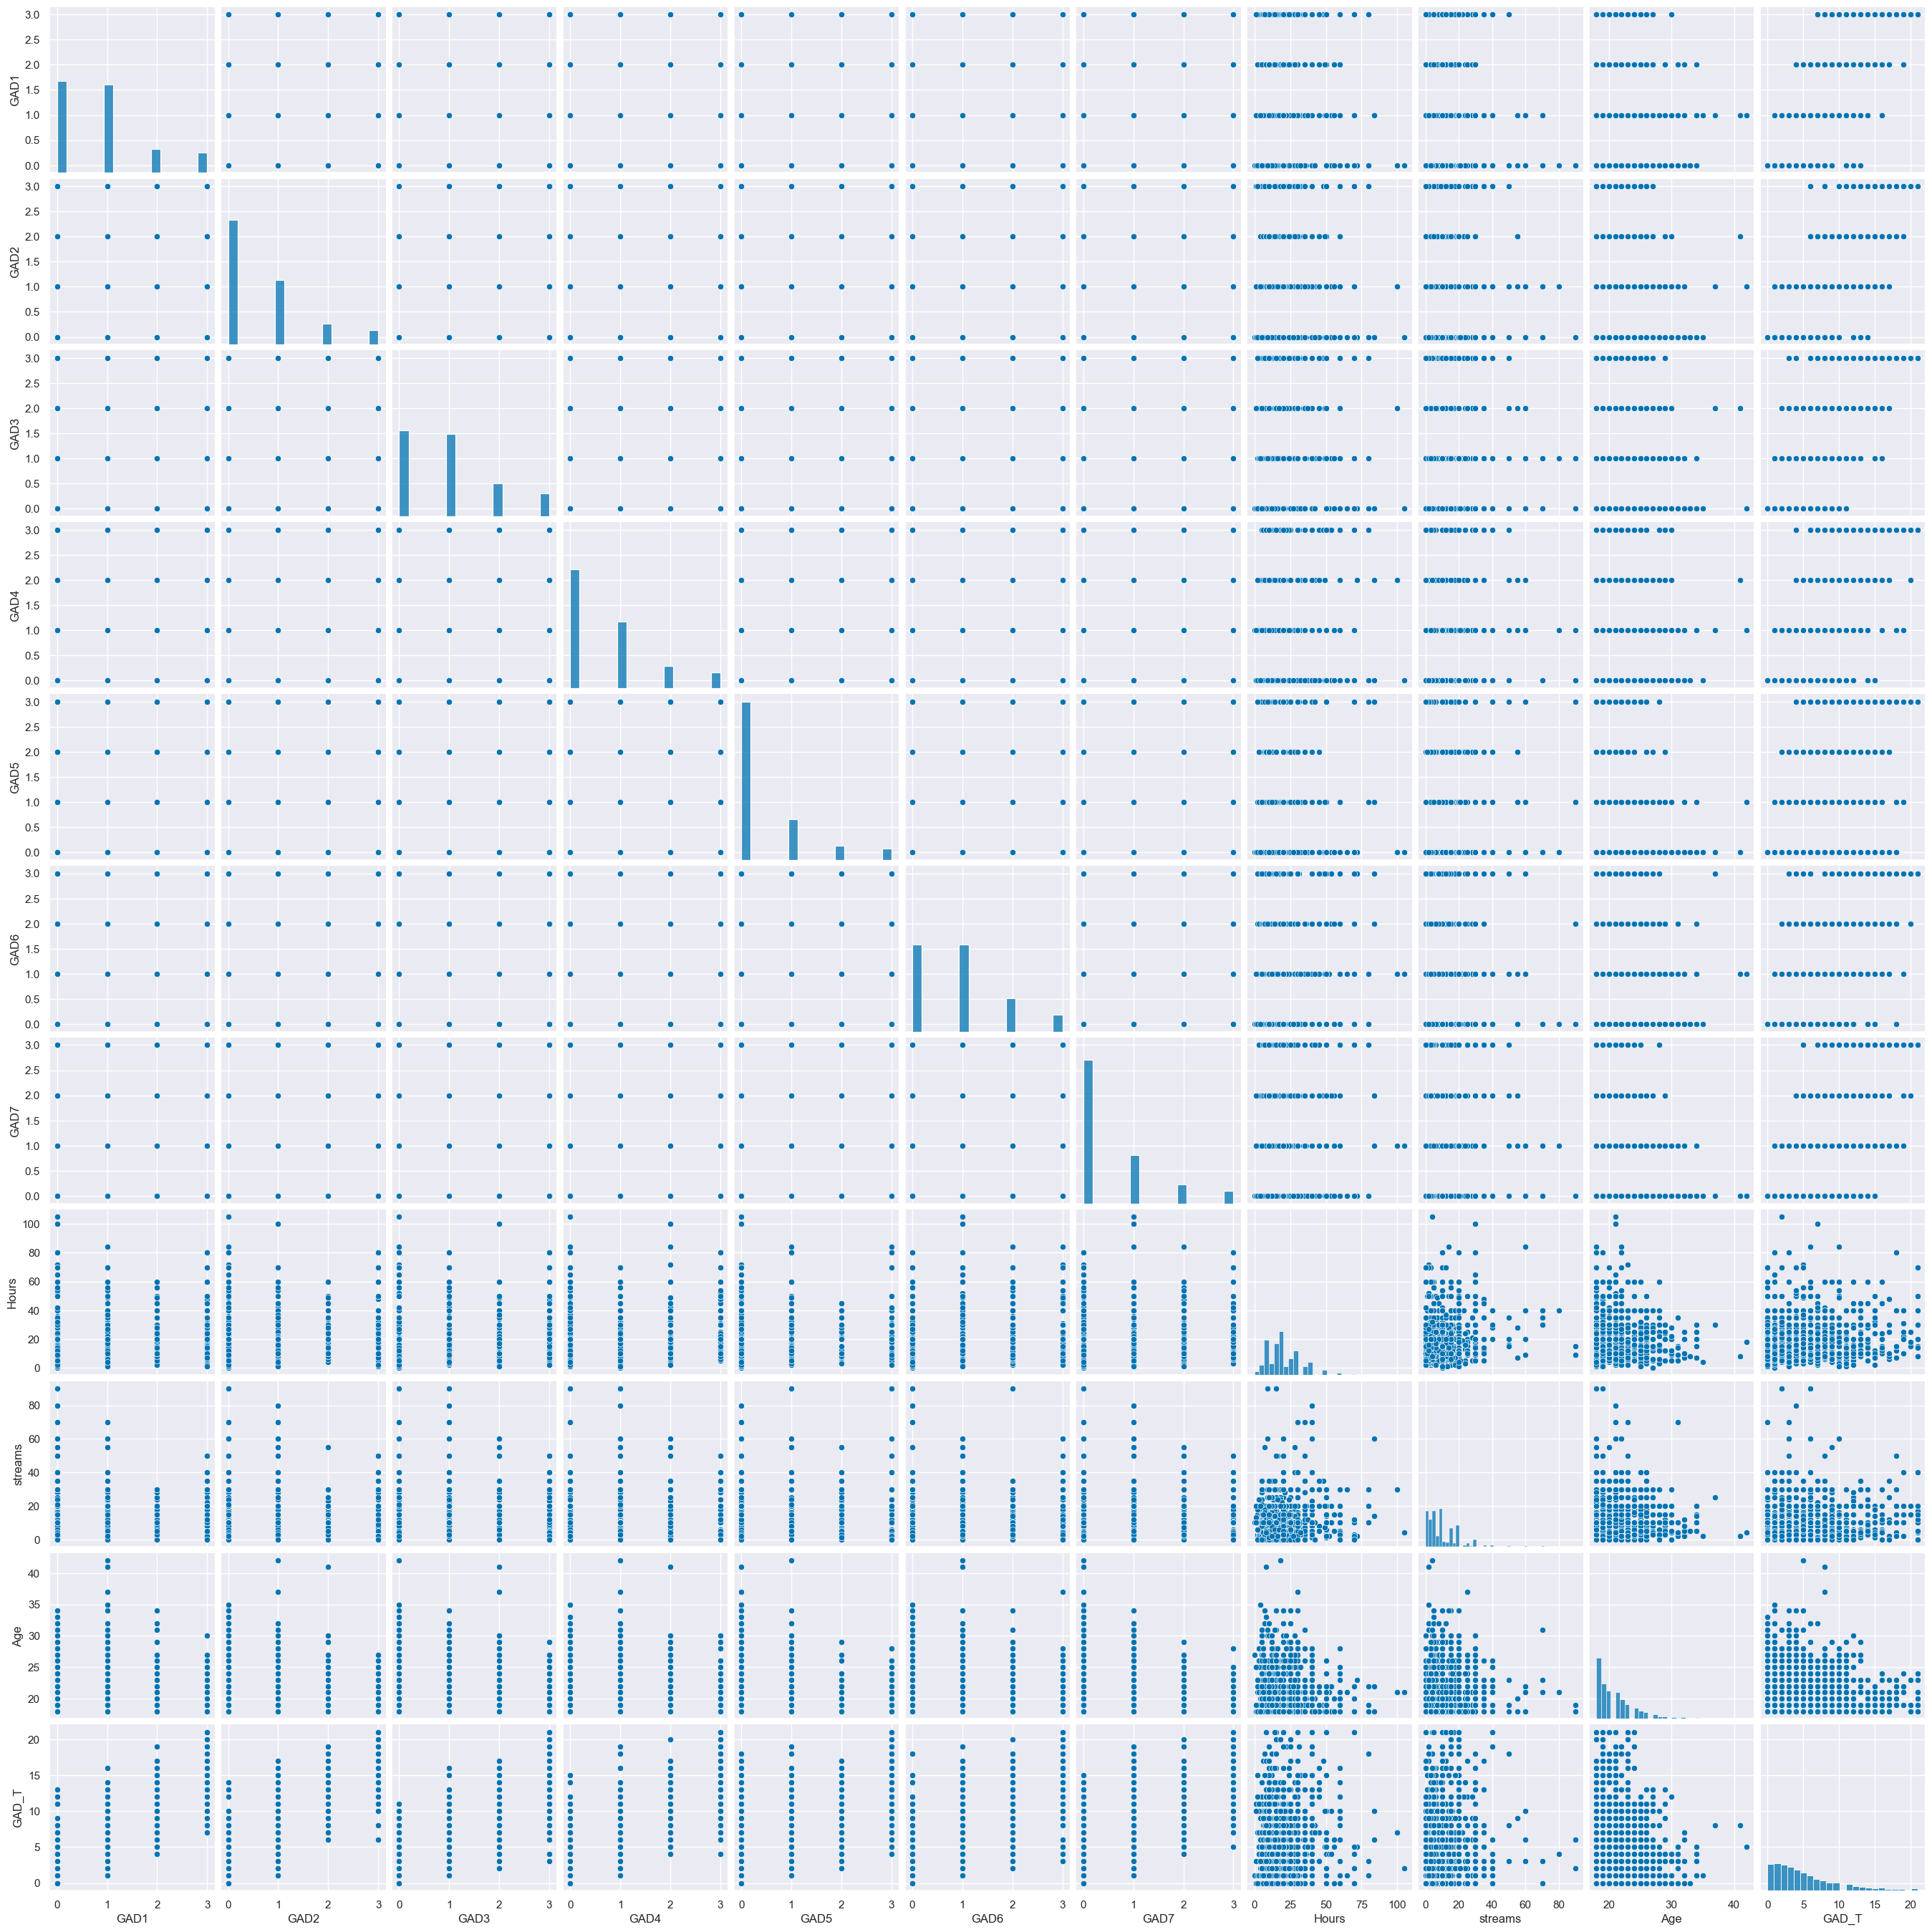

In [6]:
# plotting a pairplot
sns.pairplot(gamers_df.sample(1200))

Text(0.5, 1.0, 'Correlation Matrix for all Possible Predictor Variables')

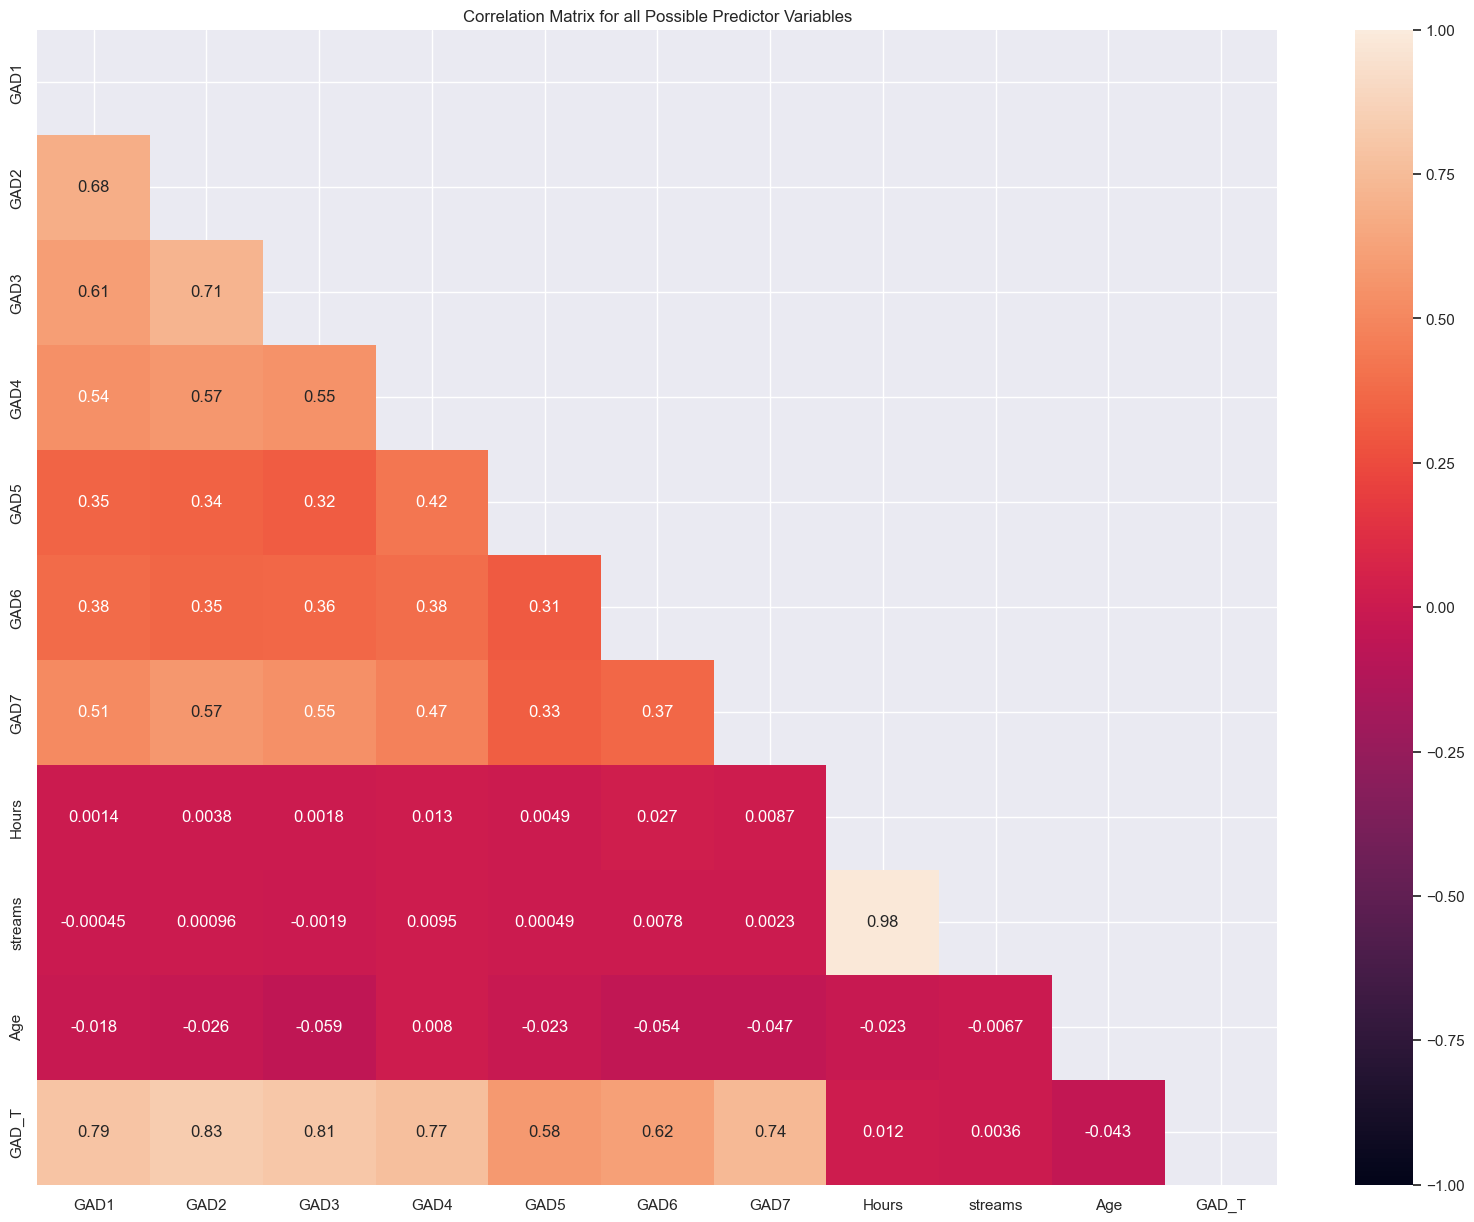

In [7]:
fig, ax = plt.subplots(figsize = (20,15))
mask = np.triu(np.ones_like(gamers_df.corr(numeric_only = True), dtype=bool))
ax = sns.heatmap(gamers_df.corr(numeric_only = True), mask=mask, vmin=-1, vmax=1, annot = True)
ax.set_title("Correlation Matrix for all Possible Predictor Variables")

## Generalized Anxiety Disorder (GAD-7) Items

In order to better visualize the relationship between our predictor variables and our target variable, we'll need to use the `GAD_T`, the sum of all scores across response categories `GAD_1-7`. Based on the total score, we can use information on the GAD-7 scale to create different classes based on the severity of anxiety. 

In [8]:
# creating a stacked bar chart for likert data 
gad_items = ['GAD1','GAD2','GAD3','GAD4','GAD5','GAD6','GAD7']
gad_responses = {0:'Not at all',
                1:'Several days',
                2:'More than half the days',
                3: 'Nearly every day'}
gad_df = gamers_df[gad_items]
gad_df = gad_df.replace(gad_responses)

In [9]:
# setting up ticks and labels for likert scale plot 
gad_items_labels = ['Feeling afraid, as if something awful might happen', 'Becoming easily annoyed or irritable',
                   'Being so restless that is hard to sit still', 'Trouble relaxing','Worrying too much about different things',
                   'Not being able to stop or control worrying', 'Feeling nervous, anxious, or on edge']
gad_ticks = [0,1,2,3,4,5,6]
gad_itemscale = ['Not at all', 'Several days', 'More than half the days', 'Nearly every day'] 

C:\Users\Kevin\anaconda3\envs\flatiron-project\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


Text(0.5, 0, 'Responses')

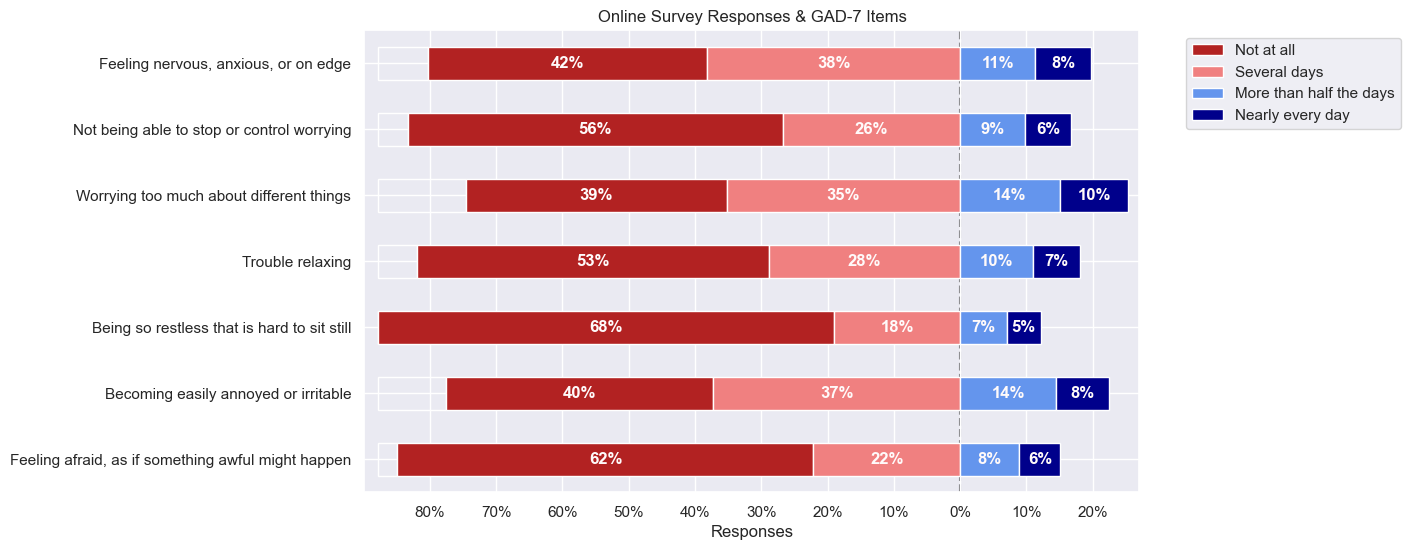

In [10]:
# plotting answers to likert questions on GAD-7 scale 
ax = plot_likert.plot_likert(gad_df, gad_itemscale,colors=plot_likert.colors.likert4, bar_labels_color='snow',
                             plot_percentage=True,bar_labels=True,figsize=(10,6))
ax.set_yticks(gad_ticks,gad_items_labels)
ax.set_title("Online Survey Responses & GAD-7 Items")
ax.set_xlabel("Responses")

In [11]:
# creating bins that capture the ranges for anxiety severity 
gad_bins = [-1,4,9,14,21]

# creating labels for each bin 
gad_bin_labels = ['minimal anxiety', 'mild anxiety','moderate anxiety',
                 'severe anxiety']

# splitting the total GAD-7 scores based on binning criteria 
gamers_df['anxiety'] = pd.cut(gamers_df['GAD_T'],
                              bins=gad_bins,labels=gad_bin_labels)

In [12]:
# side-by-side view of GAD-7 scoring by severity 
# 0-4 minmal anxiety 
# 5-9 mild anxiety
#10-14 moderate anxiety
#15-21 severe anxiety 
gamers_df.loc[:,['GAD_T','anxiety']]

,GAD_T,anxiety
S. No.,,
1,1,minimal anxiety
2,8,mild anxiety
3,8,mild anxiety
4,0,minimal anxiety
5,14,moderate anxiety
...,...,...
14246,4,minimal anxiety
14247,20,severe anxiety
14248,0,minimal anxiety


<Axes: xlabel='anxiety', ylabel='Proportion'>

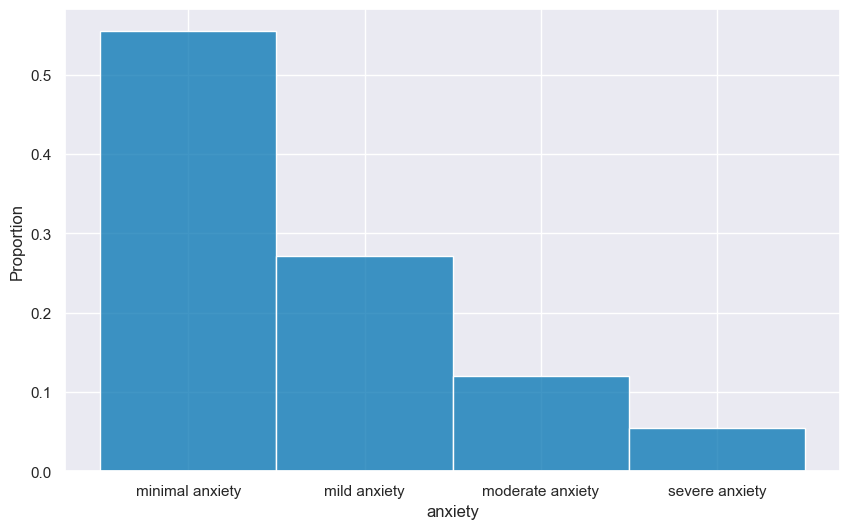

In [13]:
# histogram to capture the proportion of data which falls respective of anxiety category 
fig, ax = plt.subplots(1,1, figsize = (10, 6))
sns.histplot(x='anxiety',stat='proportion',data=gamers_df)

## Participant Demographic Information

In [14]:
# viewing the distribution of participant ages 
gamers_df['Age'].value_counts().sort_index(ascending=True)

18    3190
19    1947
20    1651
21    1344
22    1024
23     782
24     587
25     470
26     309
27     209
28     142
29     109
30      80
31      50
32      45
33      34
34      18
35      17
36      14
37       5
38       8
39       5
40       3
41       3
42       5
44       2
49       1
50       2
56       1
63       1
Name: Age, dtype: int64

In [15]:
# normalized participant age counts 
gamers_df['Age'].value_counts(normalize=True).sort_values(ascending=False).head()

18    0.264555
19    0.161470
20    0.136922
21    0.111461
22    0.084923
Name: Age, dtype: float64

In [16]:
# normalized participant gender counts
gamers_df['Gender'].value_counts(normalize=True)

Male      0.942942
Female    0.053409
Other     0.003649
Name: Gender, dtype: float64

Text(0, 0.5, 'GAD-7 Total Score')

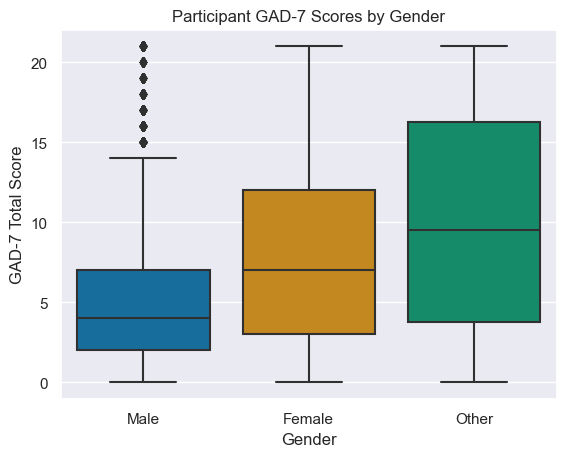

In [17]:
ax = sns.boxplot(x='Gender',y='GAD_T',data=gamers_df)
ax.set_title("Participant GAD-7 Scores by Gender")
ax.set_xlabel("Gender")
ax.set_ylabel("GAD-7 Total Score")

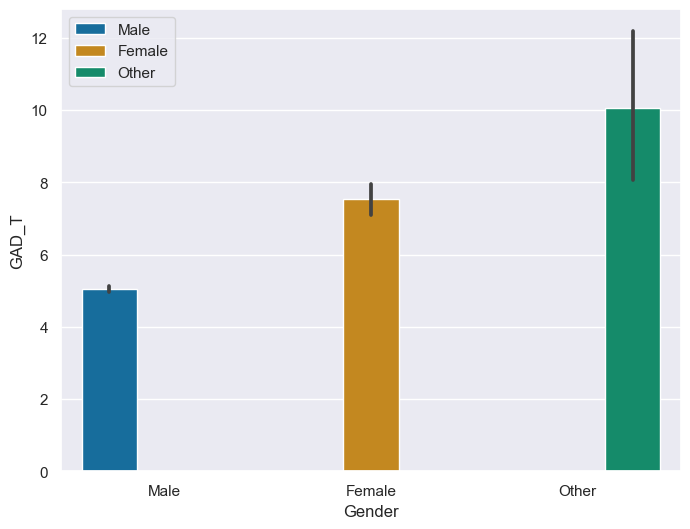

In [18]:
fig,ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x = 'Gender', y = 'GAD_T', hue='Gender',data=gamers_df)
ax.legend()

In [19]:
# side-by-side comparison of age and gender for all participants that took survey 
gamers_df.loc[:,['Age','Gender']].value_counts(normalize=True).sort_values(ascending=False)

Age  Gender
18   Male      0.253856
19   Male      0.154172
20   Male      0.129209
21   Male      0.104744
22   Male      0.078371
                 ...   
32   Other     0.000083
42   Other     0.000083
49   Male      0.000083
56   Male      0.000083
63   Male      0.000083
Length: 61, dtype: float64

<Axes: xlabel='Gender', ylabel='Proportion'>

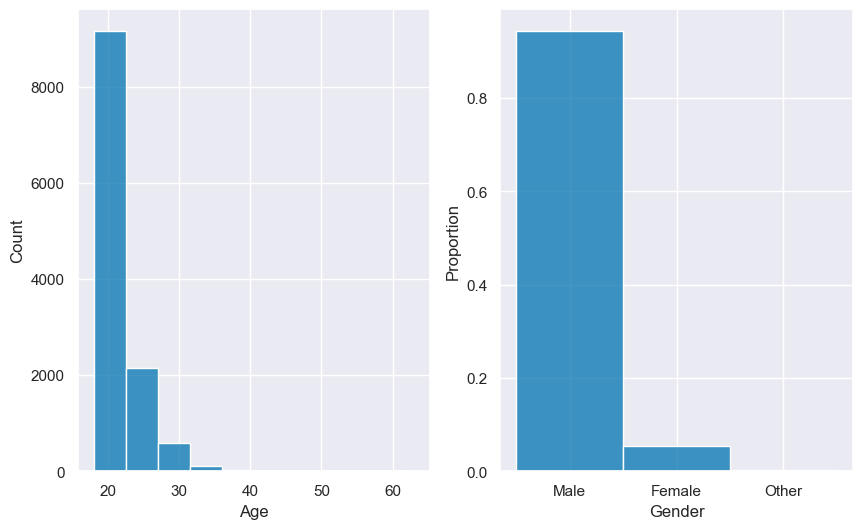

In [20]:
fig, ax = plt.subplots(1,2, figsize = (10, 6))
sns.histplot(x='Age',bins=10,data=gamers_df,ax=ax[0])
sns.histplot(x='Gender',stat='proportion',data=gamers_df,ax=ax[1])

**Looking at participant demographics, we can identify a couple of trends:** 
- Participant ages range from 18 to 63 
- Roughly 26% of the data contains information on 18 year olds 
- The majority of participants surveyed are in their early 20s 
- 94% of participants identified as male 
- 5% of participants identified as female 
- <1% of participants identified as other 
- Participants that are 18 y/o and Male make up 25% of the data 
- The majority of participants are teenage males 

### Participant Country of Residence / Origin 

In [21]:
len(gamers_df['Birthplace'].unique())

126

In [22]:
len(gamers_df[gamers_df['Birthplace'] != gamers_df['Residence']])

1340

In [23]:
# distribution of participant country of origin 
gamers_df['Birthplace'].value_counts(dropna=False,normalize=True).sort_values(ascending=False)

USA            0.321529
Germany        0.101758
UK             0.070244
Canada         0.063609
Netherlands    0.036573
                 ...   
Gibraltar      0.000083
Brunei         0.000083
Ethiopia       0.000083
Moldova        0.000083
Macau          0.000083
Name: Birthplace, Length: 126, dtype: float64

In [24]:
gamers_df[gamers_df['Birthplace'] == 'Unknown']['Birthplace'].value_counts()

Unknown    89
Name: Birthplace, dtype: int64

In [25]:
len(gamers_df['Residence'].unique())

109

In [26]:
# distribution of participant country of residence 
gamers_df['Residence'].value_counts().sort_values(ascending=False)

USA                   4162
Germany               1261
UK                     929
Canada                 903
Netherlands            443
                      ... 
Brunei                   1
Republic of Kosovo       1
St Vincent               1
El Salvador              1
Palestine                1
Name: Residence, Length: 109, dtype: int64

In [27]:
gamers_df[gamers_df['Residence'] == 'Unknown']['Residence'].value_counts()

Unknown    87
Name: Residence, dtype: int64

In [28]:
len(gamers_df[gamers_df['Birthplace'] != gamers_df['Residence']])

1340

In [29]:
# count distribution of records where country of origin != country of residence 
gamers_df[gamers_df['Birthplace'] != gamers_df['Residence']].loc[:,['Birthplace','Residence']].value_counts()

Birthplace   Residence   
New Zealand  New Zealand     49
China        Canada          34
South Korea  USA             33
China        USA             29
Canada       USA             25
                             ..
Iceland      Norway           1
             Denmark          1
Hungary      Unknown          1
             Sweden           1
Zimbabwe     UK               1
Length: 577, dtype: int64

**Looking at the geographic information participants filled out, we can identify some patterns:** 
There are 126 unique countries of origin within the dataset. The most common countries of origin include the USA, Germany, UK, Canada, and the Netherlands. There are 109 unique countries of residence within the dataset. The most common countries of residence include the USA, Germany, UK, Canada, and the Netherlands. There are 1340 records where participants' country of origin is **not** the same as their country of residence. The most common patterns are where (1) participants born in China and reside in Canada, (2) participants born in South Korea and reside in the U.S, and (3) particpants born in Canada and reside in the U.S

### Participant Employment Status 

In [30]:
gamers_df['Work'].value_counts(dropna=False,normalize=True)

Student at college / university    0.530685
Employed                           0.204760
Student at school                  0.161635
Unemployed / between jobs          0.100100
NaN                                0.002820
Name: Work, dtype: float64

<Axes: xlabel='Work', ylabel='Proportion'>

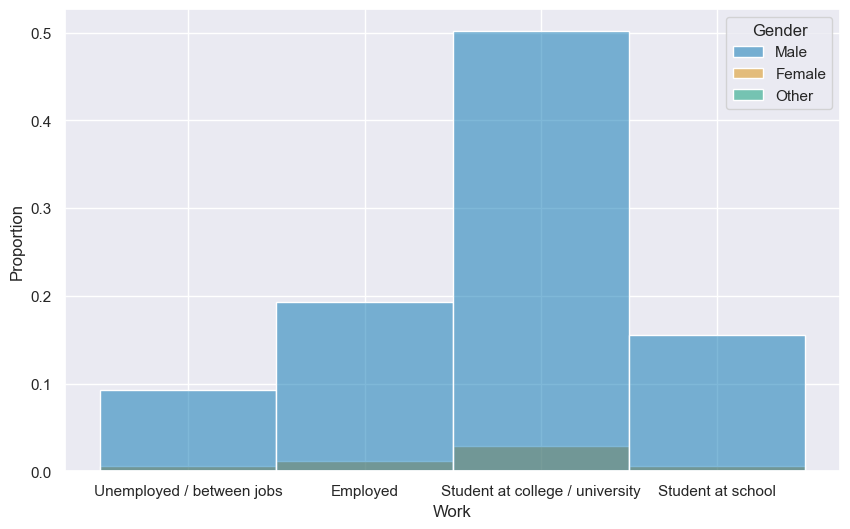

In [31]:
fig, ax = plt.subplots(1,1, figsize = (10,6))
sns.histplot(x='Work',stat='proportion',hue = 'Gender',data=gamers_df)

### Participant Degree Status 

<Axes: xlabel='Degree', ylabel='Proportion'>

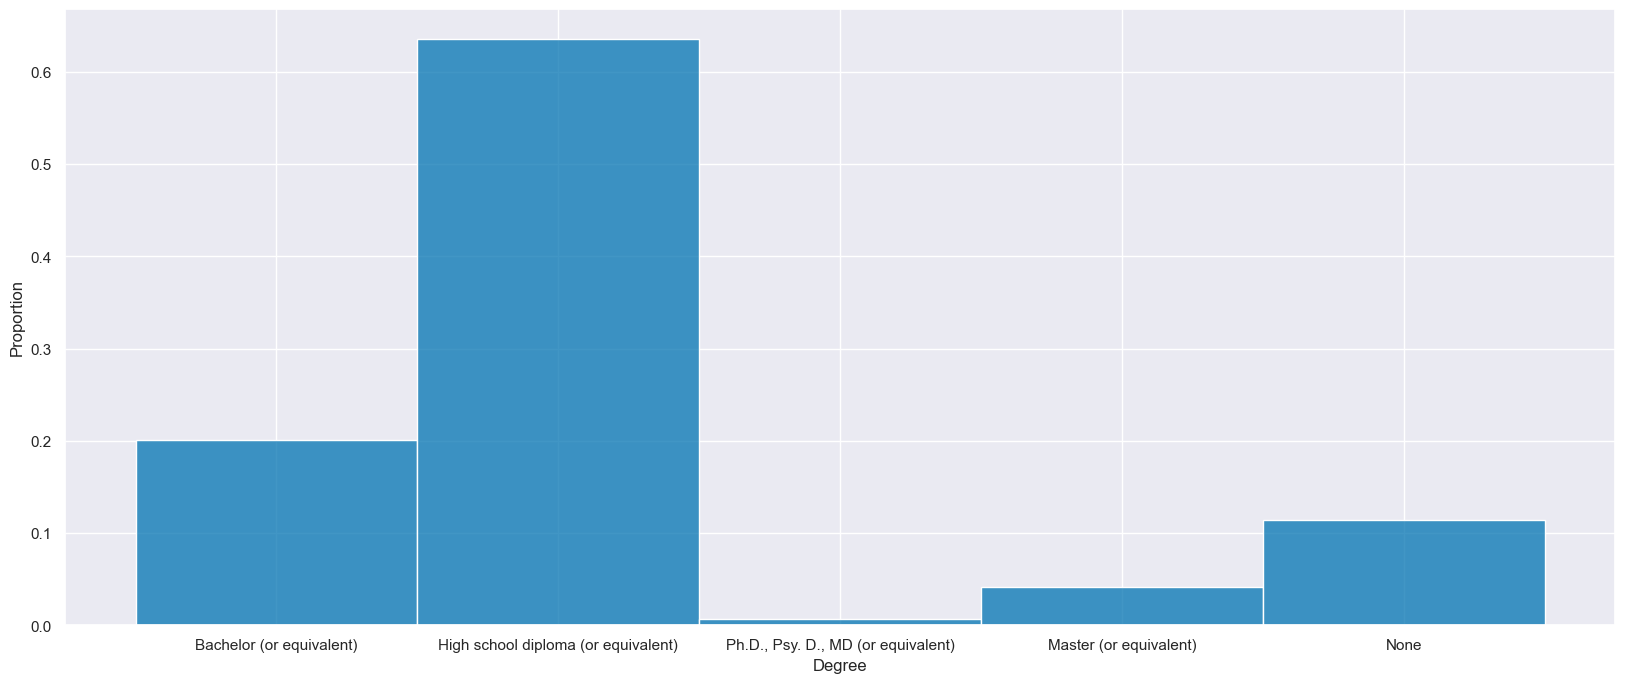

In [32]:
fig, ax = plt.subplots(1,1, figsize = (20,8))
sns.histplot(x='Degree',stat='proportion',data=gamers_df)

Looking at the distribution of responses to participants' employment status, the majority of respondents are university students with the second most frequent status being 'employed'.

## Participant Gaming Habits 

<Axes: xlabel='Game', ylabel='Proportion'>

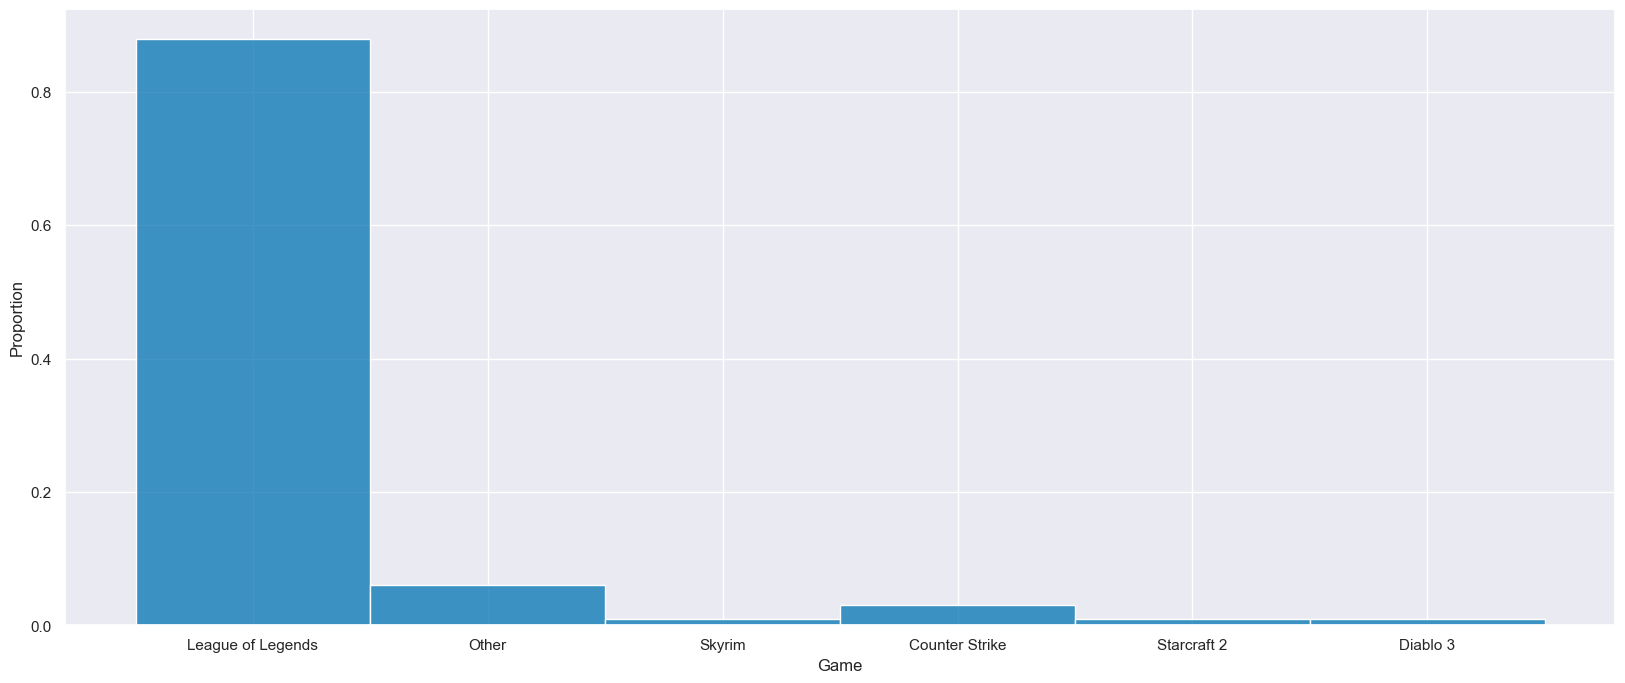

In [33]:
fig, ax = plt.subplots(1,1, figsize = (20,8))
sns.histplot(x='Game',stat='proportion',data=gamers_df.sample(100))

In [34]:
gamers_df['Hours'].describe()

count    12036.000000
mean        22.037471
std         73.982252
min          0.000000
25%         12.000000
50%         20.000000
75%         28.000000
max       8000.000000
Name: Hours, dtype: float64

<Axes: xlabel='Hours', ylabel='Proportion'>

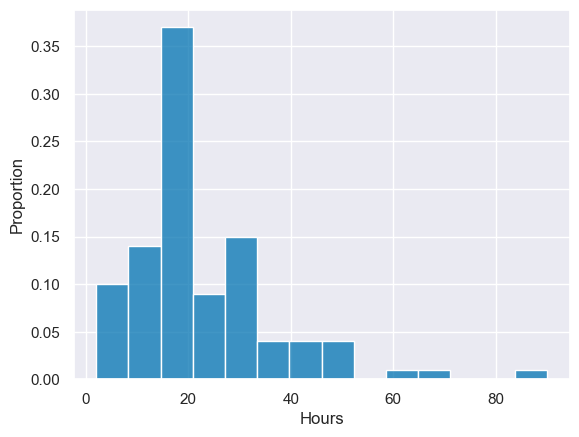

In [35]:
sns.histplot(x='Hours',stat='proportion',data=gamers_df.sample(100))

**Conclusion**

### Platform Used 

In [36]:
gamers_df['Platform'].value_counts(dropna=False)

PC                         11840
Console (PS, Xbox, ...)      199
Smartphone / Tablet           19
Name: Platform, dtype: int64

<Axes: xlabel='Platform', ylabel='Proportion'>

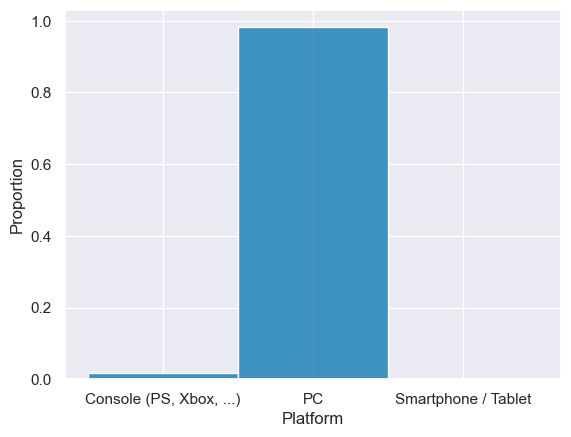

In [37]:
sns.histplot(x='Platform',stat='proportion',data=gamers_df)

### Streaming 

In [38]:
gamers_df['streams'].describe()

count    11977.00000
mean        11.31285
std         82.81723
min          0.00000
25%          4.00000
50%          8.00000
75%         15.00000
max       9001.00000
Name: streams, dtype: float64

### Reason for Playing 

<Axes: xlabel='whyplay', ylabel='count'>

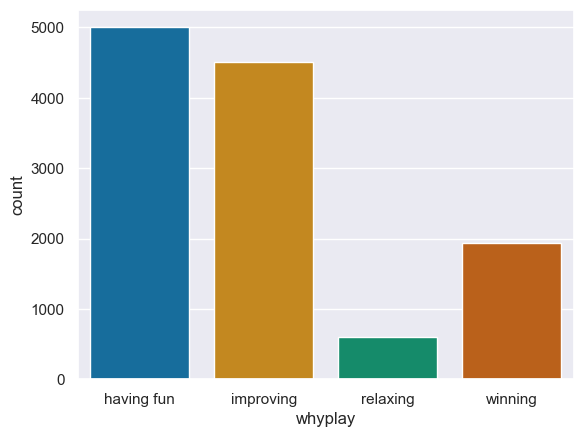

In [39]:
sns.countplot(x='whyplay',data=gamers_df)

In [40]:
gamers_df['Playstyle'].value_counts(dropna=False,normalize=True)

Multiplayer - online - with real life friends                    0.428678
Multiplayer - online - with strangers                            0.311992
Multiplayer - online - with online acquaintances or teammates    0.198789
Singleplayer                                                     0.056975
Multiplayer - offline (people in the same room)                  0.003566
Name: Playstyle, dtype: float64

### Generalized Anxiety Disorder (GAD-7) Extra Question

The `GADE` item in the GAD-7 scale is an optional item that asks: "If you checked off any problems, how difficult have these made it for you to do your work, take care of things at home, or get along with other people?" 

In [42]:
gamers_df['GADE'].value_counts(normalize=True,dropna=False)

Not difficult at all    0.462763
Somewhat difficult      0.383065
Very difficult          0.076049
NaN                     0.048930
Extremely difficult     0.029192
Name: GADE, dtype: float64

<Axes: xlabel='GADE', ylabel='Proportion'>

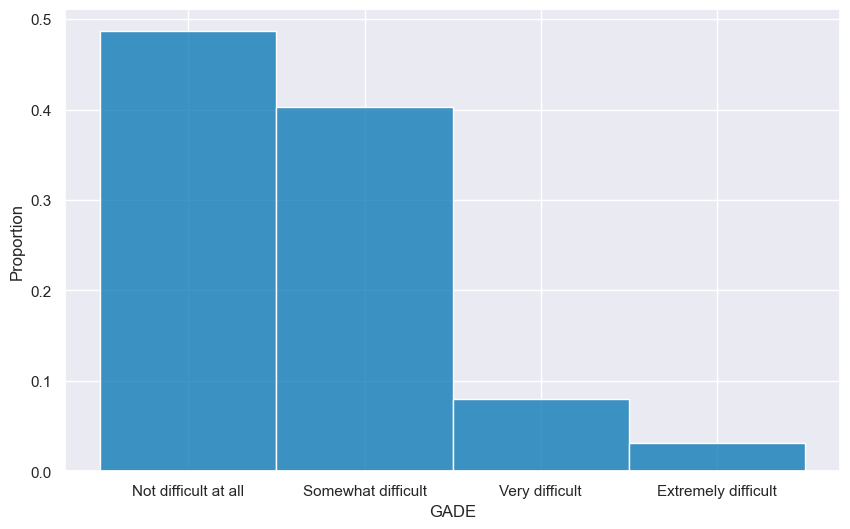

In [43]:
fig, ax = plt.subplots(1,1, figsize = (10, 6))
sns.histplot(x='GADE',stat='proportion',data=gamers_df)

**From the `GADE` item, which asseses the degree to which participants reported difficulties in their professional and interpersonal lives based on reported answers to items on the GAD-7 scale, some patterns emerge:** 
- 46% of participants reported not experiencing any difficulties associated with anxious behaviors  
- 38% of participants reported that anxious behaviors made their lives somewhat difficult 
- 7-8% of participants reported that anxious behaviors made their lives very difficult 
- less than 3% of participants reported that anxious behaviors made their lives extremely difficult 
- ~5% of participants did not answer the item in question. 

## Conclusion 

In this notebook, we have created several visualizations to better understand the underlying distributions of values for our data. 

## Exporting Data for Model Preprocessing 

In [44]:
gamers_df.to_csv('Data/preprocessed_data')